In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

digits.data.shape  # 샘플수 1797, 변수 64개(8*8 픽셀)
digits.data[0]     # 0~255로 값을 만들어줌  픽셀값/255. 로 나눠서 0.0~1.0으로 스케일링(정규화) 필요

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

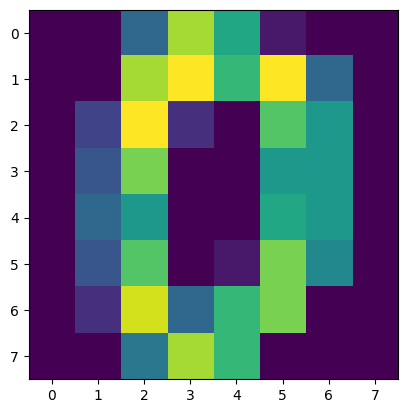

In [3]:
import matplotlib.pyplot as plt
plt.imshow(digits.data[0].reshape(8,8))

In [4]:
from sklearn.cluster import KMeans
# 비슷한 위치의 좌표들이 초기 중심좌표로 설정될 경우 불안정한 군집화 학습이 진행됨
# 최적의 초기 중심좌표들을 설정하려는 연구들이 많이 진행되었음
# 처음 1개의 좌표를 랜덤으로 선택
# 이후의 중심좌표는 이전에 선택한 중심좌표와의 거리를 계산하여 되도록 멀리 떨어진 좌표를 중심좌표로 선택
# k-means++ 기본값 /  random 랜덤으로 선택

model = KMeans(init = 'k-means++', n_clusters = 10, random_state=0)
# model_r = KMeans(init = 'random++', n_clusters = 10, random_state=0)
# init: 초기 좌표를 선택하는 알고리즘임
# k-means++: 중심좌표간에 간격을 어느정도 떼어 설정하는 알고리즘 / random: 완전 랜덤, 중심끼리 쏠리는 경우가 발생할 수 있음
# n_clusters: 중심좌표: 10개
model.fit(digits.data)
y_pred = model.labels_
print(model.cluster_centers_)   # 중심좌표

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[ 0.00000000e+00  2.24719101e-02  4.25280899e+00  1.31629213e+01
   1.12471910e+01  2.92134831e+00  3.37078652e-02  2.77555756e-17
   2.60208521e-18  8.87640449e-01  1.26629213e+01  1.33595506e+01
   1.13820225e+01  1.13483146e+01  9.66292135e-01 -2.77555756e-17
   1.30104261e-18  3.74719101e+00  1.42078652e+01  5.19662921e+00
   2.09550562e+00  1.20955056e+01  3.53370787e+00  1.38777878e-17
   0.00000000e+00  5.31460674e+00  1.26348315e+01  2.01685393e+00
   2.30337079e-01  9.06179775e+00  6.46629213e+00  0.00000000e+00
   0.00000000e+00  5.88202247e+00  1.14831461e+01  8.70786517e-01
   2.80898876e-02  8.78089888e+00  7.15730337e+00  0.00000000e+00
   0.00000000e+00  3.52808989e+00  1.33033708e+01  1.58988764e+00
   1.41573034e+00  1.13258427e+01  5.85955056e+00  1.73472348e-17
   5.20417043e-18  8.08988764e-01  1.31685393e+01  9.92696629e+00
   1.03202247e+01  1.32921348e+01  2.48314607e+00  2.24719101e-02
   0.00000000e+00  5.61797753e-03  4.21910112e+00  1.36123596e+01
   1.33426

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_1524\1483442016.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


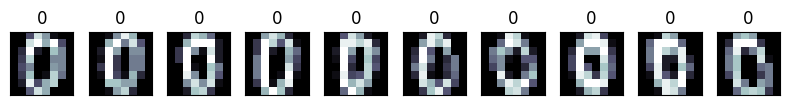

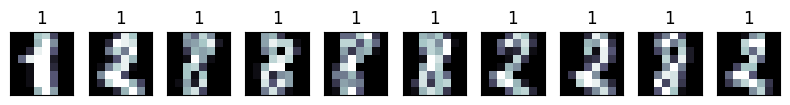

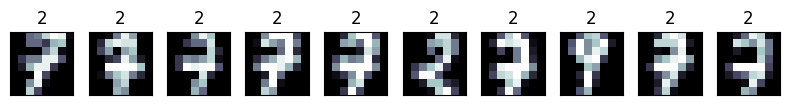

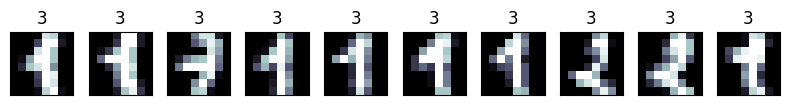

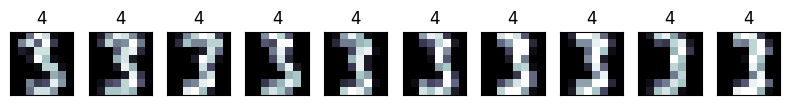

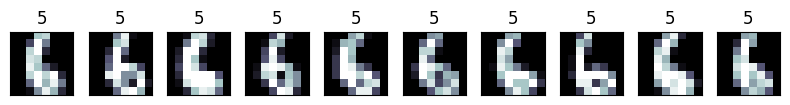

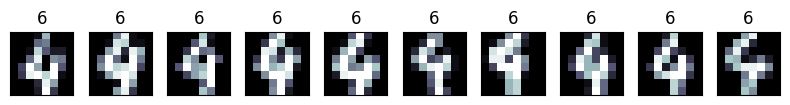

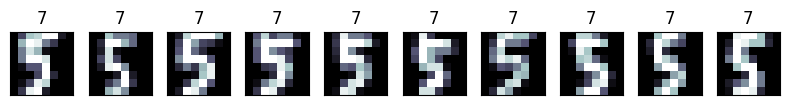

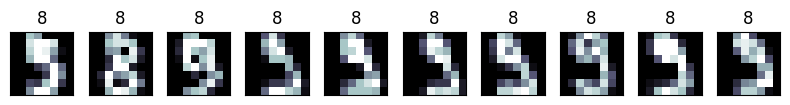

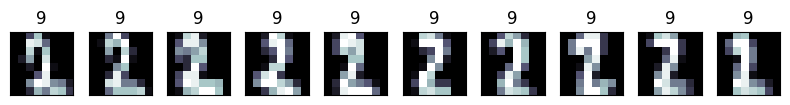

In [5]:
def show_digits(images, labels):
    f = plt.figure(figsize=(8,2))
    i = 0
    while (i<10 and i<images.shape[0]):
        ax = f.add_subplot(1, 10, i+1)
        # subplot 1행 10열, 1~10번 그림 출력
        ax.imshow(images[i], cmap = plt.cm.bone)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])  # x축 눈금 지우기
        ax.yaxis.set_ticks([])
        plt.tight_layout()  # 타이트: 레이아웃 간격 줄여줌
        i += 1

def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)

for i in range(10):
    show_cluster(digits.images, y_pred, i)

    ##### 그림위의 숫자는 의미가 없음

In [6]:
#이미지 위의 숫자는 군집 번호이므로 실제 번호와 일치하지 않음    

from sklearn.metrics import confusion_matrix
# confusion_matrix는 정답이 있을 때 의미가 있음

# cluster에서는 silhouette_score가 평가 기준
from sklearn.metrics.cluster import silhouette_score

silhouette_score(digits.data, y_pred)    # 1.0에 가까울수록 성능이 좋은 것임. 클래스 많을수록 떨어짐
# kmeans++

0.18253573914791615

In [12]:
# init: random으로 한 경우
model_r = KMeans(init = 'random', n_clusters = 10, random_state=0)
model_r.fit(digits.data)
y_pred_r = model_r.labels_
print(silhouette_score(digits.data, y_pred_r))

0.18189172660646816


c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


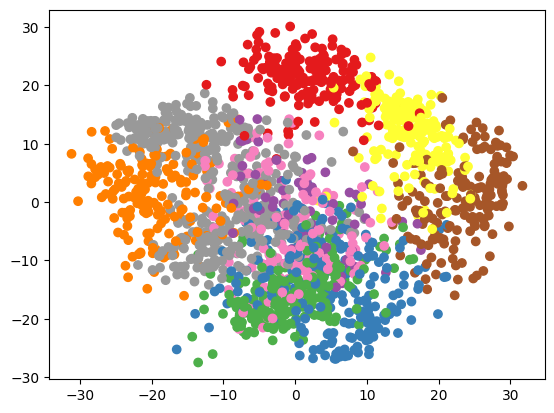

In [7]:
# 클래스 10개, 8*8, 변수는 64개: 그래프 그리기 어려움
# 군집화 결과를 주성분 분석을 통해 그래프그리기: PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# 주성분분석 : 주된 성분으로 압축 (분산량이 작은 것들)
# n_components: 주성분의 수
x = pca.fit_transform(digits.data)
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()